# Support Vector Machine (SVM)

For solving `Convex Optimization` tasks in Python, `cvxopt` package can be used. [This simple guide](https://courses.csail.mit.edu/6.867/wiki/images/a/a7/Qp-cvxopt.pdf) is enough to get an idea how the package works.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
plt.style.use("seaborn-v0_8-whitegrid") # Plot style

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2

In [2]:
from src.svm import SVM

In [3]:
# Synthetic dataset for experiments
x1 = np.array([5, 6, 7, 7, 8, 9, 0, 1, 2, 4, 5, 6])
x2 = np.array([2, 1, 3, 5, 10, 3, 4, 8, 6, 10, 9, 11])
y = np.array([1, 1, 1, 1, 1, 1, -1, -1, -1, -1, -1, -1])

data = pd.DataFrame(dict(x1 = x1, x2 = x2, y = y))
data.head()

,x1,x2,y
0,5,2,1
1,6,1,1
2,7,3,1
3,7,5,1
4,8,10,1


In [4]:
def plot_data(data):
  plt.figure(figsize=(8, 6))
  plt.plot(data.loc[data.y==1, "x1"], data.loc[data.y==1, "x2"], "bo" , label="Positive") 
  plt.plot(data.loc[data.y==-1, "x1"], data.loc[data.y==-1, "x2"], "ro" , label="Negative") 

  min_x1 = np.min(data["x1"])
  max_x1 = np.max(data["x1"])
  min_x2 = np.min(data["x2"])
  max_x2 = np.max(data["x2"])

  plt.legend(markerscale=1, loc="upper left", frameon=True, shadow=True, fontsize=12)

  plt.xticks(list(range(min_x1-1, max_x1+2)))
  plt.yticks(list(range(min_x2-1, max_x2+2)))
  plt.xlim(min_x1-1, max_x1+1)
  plt.ylim(min_x2-1, max_x2+1)
  
  plt.xlabel("$x_1$", size=12)   
  plt.ylabel("$x_2$", size=12)

In [5]:
X = data.iloc[:,:-1].values
y = data.iloc[:, -1].values.copy()

model = SVM(C=None)
model.fit(X, y)

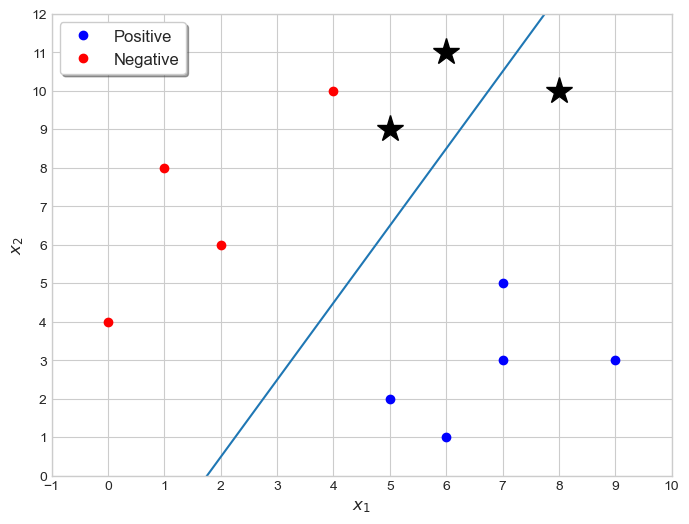

In [6]:
plot_data(data)
w = model.w
t = model.t 
x = np.arange(-5, 15)
plt.plot(x, -w[0] / w[1] * x + t / w[1])
for i in model.support_vectors:
  # Marking the support vectors with star markers
  plt.plot(*i, marker='*', markersize=20, color='k')
plt.show()

Now lets see the performance of algorithm on the synthetic dataset without the labels.

In [7]:
def synthetic_dataset():
  """
  Generate 3 Gaussian samples with different covariance matrices
  """
  n, dim = 300, 2
  np.random.seed(0)
  cov1 = np.array([[1, -1],
                   [-1, 2]])
     
  cov2 = np.array([[0.5, 0.2],
                   [0.2, 0.5]])
    
  cov3 = np.array([[2, -0.5],
                   [-0.5, 0.2]])

  # inputs
  X = np.vstack((np.random.multivariate_normal(mean=[0, 0], cov=cov1, size=n),
                 np.random.multivariate_normal(mean=[2, 2], cov=cov2, size=n),
                 np.random.multivariate_normal(mean=[-3, 3], cov=cov3, size=n)
                 ))
  # labels 0, 1, 2
  y = np.hstack((np.zeros(n), np.ones(n), np.ones(n) * 2))

  return X, y

Xs, ys = synthetic_dataset()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(Xs[ys!=0], ys[ys!=0], test_size=0.25, random_state=0)
y_train[y_train == 2] = -1
y_test[y_test == 2] = -1

In [9]:
start = time.perf_counter()
model = SVM(C=None)
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy} %")

Time taken: 0.12099979999999277 sec
Accuracy: 0.4666666666666667 %


Hard-margin SVM (C = None) performs very badly on this dataset։ it results in $46\%$ accuracy․ But when the regularization is used, things get much better.

In [10]:
start = time.perf_counter()
model = SVM(C=0.01)
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy} %")

Time taken: 0.15293289999999615 sec
Accuracy: 0.9933333333333333 %


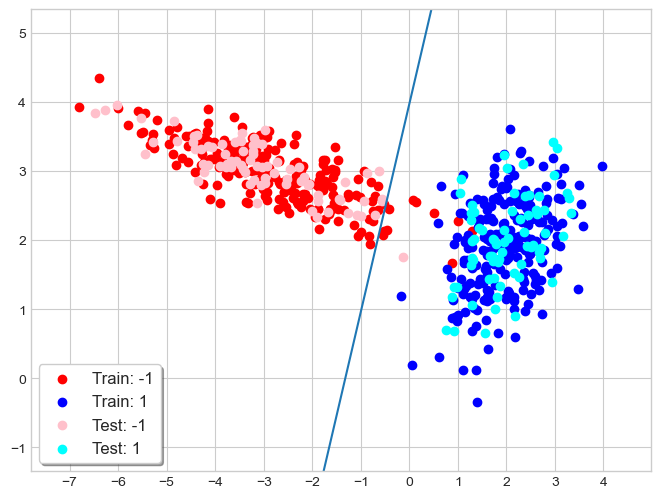

In [11]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color="red", label="Train: -1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", label="Train: 1")

plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], color="pink", label="Test: -1")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="cyan", label="Test: 1")

plt.xticks(list(range(int(np.ceil(np.min(X_train[:, 0]) - 1)), int(np.ceil(np.max(X_train[:, 0]) + 2)))))
plt.yticks(list(range(int(np.ceil(np.min(X_train[:, 1]) - 1)), int(np.ceil(np.max(X_train[:, 1]) + 2)))))

plt.xlim(np.min(X_train[:, 0]) - 1, np.max(X_train[:, 0]) + 1)
plt.ylim(np.min(X_train[:, 1]) - 1, np.max(X_train[:, 1]) + 1)

plt.legend(markerscale=1, loc="lower left", frameon=True, shadow=True, fontsize=12)

w = model.w
t = model.t 
x = np.arange(-5, 5)

plt.plot(x, -w[0] / w[1] * x + t / w[1])
plt.show()

When setting $C=1$, the model reaches to perfect classification. Find the reasons for getting such a difference.

In [12]:
start = time.perf_counter()
model = SVM(C=1)
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy = {accuracy} %")

Time taken: 0.22058419999999046 sec
Accuracy = 1.0 %


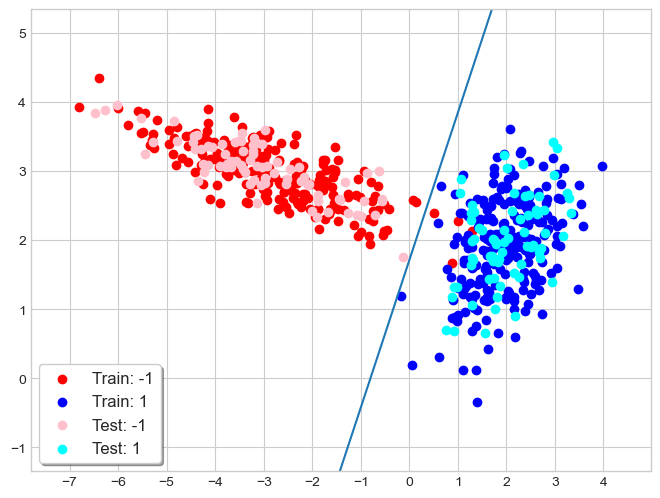

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X_train[y_train == -1, 0], X_train[y_train == -1, 1], color="red", label="Train: -1")
plt.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], color="blue", label="Train: 1")

plt.scatter(X_test[y_test == -1, 0], X_test[y_test == -1, 1], color="pink", label="Test: -1")
plt.scatter(X_test[y_test == 1, 0], X_test[y_test == 1, 1], color="cyan", label="Test: 1")

plt.xticks(list(range(int(np.ceil(np.min(X_train[:, 0]) - 1)), int(np.ceil(np.max(X_train[:, 0]) + 2)))))
plt.yticks(list(range(int(np.ceil(np.min(X_train[:, 1]) - 1)), int(np.ceil(np.max(X_train[:, 1]) + 2)))))

plt.xlim(np.min(X_train[:,0])-1, np.max(X_train[:, 0]) + 1)
plt.ylim(np.min(X_train[:,1])-1, np.max(X_train[:, 1]) + 1)

plt.legend(markerscale=1, loc='lower left', frameon=True, shadow=True, fontsize=12)
w = model.w
t = model.t 
x = np.arange(-5, 5)

plt.plot(x, -w[0] / w[1] * x + t / w[1])
plt.show()

Compare with `sklearn`'s implementation.

In [14]:
from sklearn.svm import SVC

start = time.perf_counter()
model = SVC(C=1e-18, kernel="linear")
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy} %")

Time taken: 0.011797900000033223 sec
Accuracy: 0.4666666666666667 %


In [15]:
start = time.perf_counter()
model = SVC(C=0.01, kernel="linear")
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy} %")

Time taken: 0.003264699999988352 sec
Accuracy: 0.9933333333333333 %


In [16]:
start = time.perf_counter()
model = SVC(C=1, kernel="linear")
model.fit(X_train, y_train)
print(f"Time taken: {time.perf_counter() - start} sec")

predictions = model.predict(X_test)
accuracy = accuracy_score(predictions, y_test)
print(f"Accuracy: {accuracy} %")

Time taken: 0.0028297000000065964 sec
Accuracy: 1.0 %
